### Packages

In [463]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from tensorflow.keras import optimizers
from numpy import array 
##Removes warning for chained assignments
pd.options.mode.chained_assignment = None  # default='warn'

In [464]:
df = pd.read_csv('../raw_data/ratios.csv')
df

,Date,ALB_ZBRA,NRG_CPRT,DE_BXP,NRG_STE,NRG_XRAY,SO_NLOK,PEG_O
0,2020-08-31,0.311845,0.310544,2.548054,0.203834,0.727693,2.136432,0.882281
1,2020-09-01,0.332974,0.306303,2.687319,0.203522,0.722940,2.094566,0.855546
2,2020-09-02,0.332368,0.315056,2.629334,0.204743,0.734758,2.125291,0.872526
3,2020-09-03,0.339772,0.310060,2.534974,0.201707,0.728923,2.210971,0.848504
4,2020-09-04,0.356920,0.300754,2.536138,0.199887,0.707646,2.152835,0.854765
...,...,...,...,...,...,...,...,...
492,2022-08-15,0.813028,0.321488,4.111073,0.197467,1.123670,3.277218,0.920803
493,2022-08-16,0.814154,0.323634,4.118669,0.200499,1.158238,3.283272,0.933379
494,2022-08-17,0.815450,0.327442,4.154118,0.201342,1.191888,3.347435,0.935173
495,2022-08-18,0.816374,0.333768,4.222490,0.204492,1.196920,3.371537,0.950678


In [465]:
A = df[['Date','DE_BXP']]
A.set_index('Date',inplace=True)
A.rename(columns = {'DE_BXP': 'Ratio'},inplace=True)
A.head()

,Ratio
Date,
2020-08-31,2.548054
2020-09-01,2.687319
2020-09-02,2.629334
2020-09-03,2.534974
2020-09-04,2.536138


### Create time lags t-1 , t-40

In [466]:
for i in range(1,41):
    A[f't-{i}'] = A['Ratio'].shift(i)
A.dropna(inplace = True)


In [467]:
A

,Ratio,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,...,t-31,t-32,t-33,t-34,t-35,t-36,t-37,t-38,t-39,t-40
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-27,3.237814,3.245641,3.222230,3.205150,3.247866,3.277922,3.274337,3.229360,3.131104,3.129796,...,2.677965,2.734847,2.682495,2.655864,2.558780,2.536138,2.534974,2.629334,2.687319,2.548054
2020-10-28,3.280195,3.237814,3.245641,3.222230,3.205150,3.247866,3.277922,3.274337,3.229360,3.131104,...,2.590479,2.677965,2.734847,2.682495,2.655864,2.558780,2.536138,2.534974,2.629334,2.687319
2020-10-29,3.325579,3.280195,3.237814,3.245641,3.222230,3.205150,3.247866,3.277922,3.274337,3.229360,...,2.523923,2.590479,2.677965,2.734847,2.682495,2.655864,2.558780,2.536138,2.534974,2.629334
2020-10-30,3.259769,3.325579,3.280195,3.237814,3.245641,3.222230,3.205150,3.247866,3.277922,3.274337,...,2.637538,2.523923,2.590479,2.677965,2.734847,2.682495,2.655864,2.558780,2.536138,2.534974
2020-11-02,3.183293,3.259769,3.325579,3.280195,3.237814,3.245641,3.222230,3.205150,3.247866,3.277922,...,2.755974,2.637538,2.523923,2.590479,2.677965,2.734847,2.682495,2.655864,2.558780,2.536138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-15,4.111073,4.085673,4.033883,4.015041,3.989784,3.965274,3.964777,3.950842,3.806674,3.784327,...,3.365588,3.340184,3.406658,3.453111,3.403160,3.329281,3.593728,3.684691,3.598200,3.611955
2022-08-16,4.118669,4.111073,4.085673,4.033883,4.015041,3.989784,3.965274,3.964777,3.950842,3.806674,...,3.329250,3.365588,3.340184,3.406658,3.453111,3.403160,3.329281,3.593728,3.684691,3.598200
2022-08-17,4.154118,4.118669,4.111073,4.085673,4.033883,4.015041,3.989784,3.965274,3.964777,3.950842,...,3.204585,3.329250,3.365588,3.340184,3.406658,3.453111,3.403160,3.329281,3.593728,3.684691


### Create training split

In [468]:
X_train = A.loc[:, 't-1':'t-40']
X_train = X_train.iloc[0:452]
X_train

,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,t-10,...,t-31,t-32,t-33,t-34,t-35,t-36,t-37,t-38,t-39,t-40
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-27,3.245641,3.222230,3.205150,3.247866,3.277922,3.274337,3.229360,3.131104,3.129796,3.107535,...,2.677965,2.734847,2.682495,2.655864,2.558780,2.536138,2.534974,2.629334,2.687319,2.548054
2020-10-28,3.237814,3.245641,3.222230,3.205150,3.247866,3.277922,3.274337,3.229360,3.131104,3.129796,...,2.590479,2.677965,2.734847,2.682495,2.655864,2.558780,2.536138,2.534974,2.629334,2.687319
2020-10-29,3.280195,3.237814,3.245641,3.222230,3.205150,3.247866,3.277922,3.274337,3.229360,3.131104,...,2.523923,2.590479,2.677965,2.734847,2.682495,2.655864,2.558780,2.536138,2.534974,2.629334
2020-10-30,3.325579,3.280195,3.237814,3.245641,3.222230,3.205150,3.247866,3.277922,3.274337,3.229360,...,2.637538,2.523923,2.590479,2.677965,2.734847,2.682495,2.655864,2.558780,2.536138,2.534974
2020-11-02,3.259769,3.325579,3.280195,3.237814,3.245641,3.222230,3.205150,3.247866,3.277922,3.274337,...,2.755974,2.637538,2.523923,2.590479,2.677965,2.734847,2.682495,2.655864,2.558780,2.536138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-08,3.964777,3.950842,3.806674,3.784327,3.778237,3.764590,3.681505,3.619000,3.616552,3.622252,...,3.329281,3.593728,3.684691,3.598200,3.611955,3.617357,3.628784,3.587556,3.483541,3.528425
2022-08-09,3.965274,3.964777,3.950842,3.806674,3.784327,3.778237,3.764590,3.681505,3.619000,3.616552,...,3.403160,3.329281,3.593728,3.684691,3.598200,3.611955,3.617357,3.628784,3.587556,3.483541
2022-08-10,3.989784,3.965274,3.964777,3.950842,3.806674,3.784327,3.778237,3.764590,3.681505,3.619000,...,3.453111,3.403160,3.329281,3.593728,3.684691,3.598200,3.611955,3.617357,3.628784,3.587556


In [469]:
y_train = A['Ratio'][0:452]
y_train

Date
2020-10-27    3.237814
2020-10-28    3.280195
2020-10-29    3.325579
2020-10-30    3.259769
2020-11-02    3.183293
                ...   
2022-08-08    3.965274
2022-08-09    3.989784
2022-08-10    4.015041
2022-08-11    4.033883
2022-08-12    4.085673
Name: Ratio, Length: 452, dtype: float64

In [470]:
X_test_1 = A.loc[:, 't-1':'t-40']
X_test_1 = X_test_1.iloc[452:453]
X_test_1

,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,t-10,...,t-31,t-32,t-33,t-34,t-35,t-36,t-37,t-38,t-39,t-40
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-15,4.085673,4.033883,4.015041,3.989784,3.965274,3.964777,3.950842,3.806674,3.784327,3.778237,...,3.365588,3.340184,3.406658,3.453111,3.40316,3.329281,3.593728,3.684691,3.5982,3.611955


In [471]:
y_test = A['Ratio'][452:]
y_test

Date
2022-08-15    4.111073
2022-08-16    4.118669
2022-08-17    4.154118
2022-08-18    4.222490
2022-08-19    4.280950
Name: Ratio, dtype: float64

### Create Training Splits 

In [472]:
X_train.shape

(452, 40)

In [473]:
X = []
for i in range(len(X_train['t-1'])):
    arr = []
    for j in range(1,X_train.shape[1]):
        arr.append(A[f't-{j}'][i])
    X.append(arr)

In [474]:
X[0]

[3.2456407929476554,
 3.222229773562757,
 3.205150218751162,
 3.2478656500972005,
 3.2779219286482038,
 3.2743365294245943,
 3.229359821434649,
 3.1311036342428924,
 3.1297956838436742,
 3.107534969474048,
 2.988218093468657,
 2.9637470654019165,
 2.907726967108832,
 2.924360151915326,
 2.848555841107954,
 2.806353912095168,
 2.754422847009183,
 2.7630300996782853,
 2.883784765459694,
 2.8656314308802204,
 2.8263720913573467,
 2.8742649942604475,
 2.874233610073082,
 2.8617823190900604,
 2.8481193028736778,
 2.7829186564998283,
 2.7559744752073816,
 2.637538359853905,
 2.523923456581082,
 2.590479153883456,
 2.6779647278902603,
 2.73484681673303,
 2.6824952986142185,
 2.6558635873074423,
 2.558779711612276,
 2.536138039380368,
 2.5349741020244227,
 2.6293343898019,
 2.687318887115929]

In [475]:
y_test =y_test.to_list()
y_train =y_train.to_list()

In [476]:
X = array(X)
X = X.reshape((X.shape[0], X.shape[1], 1))
X.shape

(452, 39, 1)

In [477]:
y_train = array(y_train)


### Define Model 

In [478]:
model = Sequential()
model.add(layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(40,1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mape')
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_18 (Conv1D)          (None, 39, 64)            192       
                                                                 
 max_pooling1d_17 (MaxPoolin  (None, 19, 64)           0         
 g1D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 1216)              0         
                                                                 
 dense_32 (Dense)            (None, 50)                60850     
                                                                 
 dense_33 (Dense)            (None, 1)                 51        
                                                                 
Total params: 61,093
Trainable params: 61,093
Non-trainable params: 0
_________________________________________________

#### Train Model

In [495]:
model.fit(X_train,y_train, epochs=1000, verbose=1)

Epoch 1/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7345
Epoch 2/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.9492
Epoch 3/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.4097
Epoch 4/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.2223
Epoch 5/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.4376
Epoch 6/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.8053
Epoch 7/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.2948
Epoch 8/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7162
Epoch 9/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.5538
Epoch 10/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.2984
Epoch 11/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.2115
Epoch 12/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.5347
Epoch 13/1000
15/15 [====

15/15 [==============================] - 0s 4ms/step - loss: 2.2601
Epoch 102/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.9612
Epoch 103/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.2394
Epoch 104/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.7387
Epoch 105/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.2260
Epoch 106/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.1900
Epoch 107/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.1956
Epoch 108/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.5933
Epoch 109/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.3085
Epoch 110/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.2492
Epoch 111/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.2655
Epoch 112/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.9951
Epoch 113/1000
15/1

15/15 [==============================] - 0s 4ms/step - loss: 2.3746
Epoch 200/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.9918
Epoch 201/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.8726
Epoch 202/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.9486
Epoch 203/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.1519
Epoch 204/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.0504
Epoch 205/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.8793
Epoch 206/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.8957
Epoch 207/1000
15/15 [==============================] - 0s 4ms/step - loss: 3.0308
Epoch 208/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.5911
Epoch 209/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.1291
Epoch 210/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.8767
Epoch 211/1000
15/1

15/15 [==============================] - 0s 4ms/step - loss: 1.9066
Epoch 298/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.9242
Epoch 299/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.9266
Epoch 300/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.9226
Epoch 301/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.9642
Epoch 302/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.9207
Epoch 303/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.1030
Epoch 304/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.1806
Epoch 305/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.8430
Epoch 306/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.0527
Epoch 307/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.0071
Epoch 308/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.0588
Epoch 309/1000
15/1

15/15 [==============================] - 0s 4ms/step - loss: 2.1436
Epoch 396/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.8363
Epoch 397/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.8214
Epoch 398/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.8022
Epoch 399/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.7526
Epoch 400/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.7972
Epoch 401/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.8940
Epoch 402/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.8986
Epoch 403/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.9213
Epoch 404/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.0160
Epoch 405/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.8092
Epoch 406/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.8616
Epoch 407/1000
15/1

15/15 [==============================] - 0s 4ms/step - loss: 1.9583
Epoch 494/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.7669
Epoch 495/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.1362
Epoch 496/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.2625
Epoch 497/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.7693
Epoch 498/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.0407
Epoch 499/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.7507
Epoch 500/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.8598
Epoch 501/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.1757
Epoch 502/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.8324
Epoch 503/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.8845
Epoch 504/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.7494
Epoch 505/1000
15/1

15/15 [==============================] - 0s 3ms/step - loss: 1.8206
Epoch 592/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.1585
Epoch 593/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.7682
Epoch 594/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.0353
Epoch 595/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.0075
Epoch 596/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.8423
Epoch 597/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.7432
Epoch 598/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.7518
Epoch 599/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.7647
Epoch 600/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.7040
Epoch 601/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.6909
Epoch 602/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.7552
Epoch 603/1000
15/1

15/15 [==============================] - 0s 4ms/step - loss: 1.6911
Epoch 690/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.7190
Epoch 691/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.8745
Epoch 692/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.7289
Epoch 693/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.0192
Epoch 694/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.8832
Epoch 695/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.7597
Epoch 696/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.6978
Epoch 697/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.7222
Epoch 698/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.7906
Epoch 699/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.7181
Epoch 700/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.7693
Epoch 701/1000
15/1

15/15 [==============================] - 0s 4ms/step - loss: 1.7775
Epoch 788/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.7014
Epoch 789/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.7824
Epoch 790/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.6903
Epoch 791/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.7208
Epoch 792/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.6937
Epoch 793/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.8501
Epoch 794/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.7053
Epoch 795/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.7394
Epoch 796/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.7824
Epoch 797/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.9248
Epoch 798/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.7028
Epoch 799/1000
15/1

15/15 [==============================] - 0s 4ms/step - loss: 1.8683
Epoch 886/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.7844
Epoch 887/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.6997
Epoch 888/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.7151
Epoch 889/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.7861
Epoch 890/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.7693
Epoch 891/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.7639
Epoch 892/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.8874
Epoch 893/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.8290
Epoch 894/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.7134
Epoch 895/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.8454
Epoch 896/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.8812
Epoch 897/1000
15/1

15/15 [==============================] - 0s 4ms/step - loss: 1.9483
Epoch 984/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.8595
Epoch 985/1000
15/15 [==============================] - 0s 4ms/step - loss: 2.1108
Epoch 986/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.8418
Epoch 987/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.7537
Epoch 988/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.8427
Epoch 989/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.9848
Epoch 990/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.9415
Epoch 991/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.8334
Epoch 992/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.6720
Epoch 993/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.7315
Epoch 994/1000
15/15 [==============================] - 0s 4ms/step - loss: 1.6961
Epoch 995/1000
15/1

#### Make prediction for first day

In [496]:
pred = model.predict(array(X_test_1).reshape(1,40,1))

1/1 [==============================] - 0s 23ms/step


In [497]:
pred,y_test[0]

(array([[4.082235]], dtype=float32), 4.11107349538599)

#### Add prediction to test data for 2nd day 

In [498]:
X_test_2 = A.loc[:, 't-1':'t-40']
X_test_2 = X_test_2.iloc[453:454]
X_test_2

# replace the 'unknown' previous day t-1 with prediction
X_test_2.at['2022-08-16','t-1'] = pred
X_test_2

,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,t-10,...,t-31,t-32,t-33,t-34,t-35,t-36,t-37,t-38,t-39,t-40
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-16,4.082235,4.085673,4.033883,4.015041,3.989784,3.965274,3.964777,3.950842,3.806674,3.784327,...,3.32925,3.365588,3.340184,3.406658,3.453111,3.40316,3.329281,3.593728,3.684691,3.5982


In [499]:
pred2 = model.predict(array(X_test_2).reshape(1,40,1))

1/1 [==============================] - 0s 22ms/step


In [500]:
pred2,y_test[1]

(array([[4.066238]], dtype=float32), 4.118668634585557)

#### Add prediction to test data for 3rd day 

In [501]:
X_test_3 = A.loc[:, 't-1':'t-40']
X_test_3 = X_test_3.iloc[454:455]
X_test_3

## replace the 'unknown' previous day t-1 with prediction
X_test_3.at['2022-08-17','t-2'] = pred
X_test_3.at['2022-08-17','t-1'] = pred2
X_test_3

,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,t-10,...,t-31,t-32,t-33,t-34,t-35,t-36,t-37,t-38,t-39,t-40
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-17,4.066238,4.082235,4.085673,4.033883,4.015041,3.989784,3.965274,3.964777,3.950842,3.806674,...,3.204585,3.32925,3.365588,3.340184,3.406658,3.453111,3.40316,3.329281,3.593728,3.684691


In [502]:
pred3 = model.predict(array(X_test_3).reshape(1,40,1))
pred3,y_test[2]

1/1 [==============================] - 0s 18ms/step


(array([[4.055942]], dtype=float32), 4.154117765556417)

#### Prediction 4th day

In [503]:
X_test_4 = A.loc[:, 't-1':'t-40']
X_test_4 = X_test_4.iloc[455:456]
X_test_4

## replace the 'unknown' previous day t-1 with prediction
X_test_4.at['2022-08-18','t-3'] = pred
X_test_4.at['2022-08-18','t-2'] = pred2
X_test_4.at['2022-08-18','t-1'] = pred3
X_test_4

,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,t-10,...,t-31,t-32,t-33,t-34,t-35,t-36,t-37,t-38,t-39,t-40
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-18,4.055942,4.066238,4.082235,4.085673,4.033883,4.015041,3.989784,3.965274,3.964777,3.950842,...,3.211596,3.204585,3.32925,3.365588,3.340184,3.406658,3.453111,3.40316,3.329281,3.593728


In [504]:
pred4 = model.predict(array(X_test_4).reshape(1,40,1))
pred4,y_test[3]

1/1 [==============================] - 0s 18ms/step


(array([[4.0547304]], dtype=float32), 4.222489773853895)

#### Prediction Day 5 

In [505]:
X_test_5 = A.loc[:, 't-1':'t-40']
X_test_5 = X_test_5.iloc[456:457]
X_test_5

## replace the 'unknown' previous day t-1 with prediction
X_test_5.at['2022-08-19','t-4'] = pred
X_test_5.at['2022-08-19','t-3'] = pred2
X_test_5.at['2022-08-19','t-2'] = pred3
X_test_5.at['2022-08-19','t-1'] = pred4

X_test_5

,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,t-10,...,t-31,t-32,t-33,t-34,t-35,t-36,t-37,t-38,t-39,t-40
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-19,4.05473,4.055942,4.066238,4.082235,4.085673,4.033883,4.015041,3.989784,3.965274,3.964777,...,3.355448,3.211596,3.204585,3.32925,3.365588,3.340184,3.406658,3.453111,3.40316,3.329281


In [506]:
pred5 = model.predict(array(X_test_5).reshape(1,40,1))
pred5,y_test[4]

1/1 [==============================] - 0s 18ms/step


(array([[4.0367837]], dtype=float32), 4.280949741682922)

#### Combine predictions

In [507]:
predictions = [pred[0],pred2[0],pred3[0],pred4[0],pred5[0]]

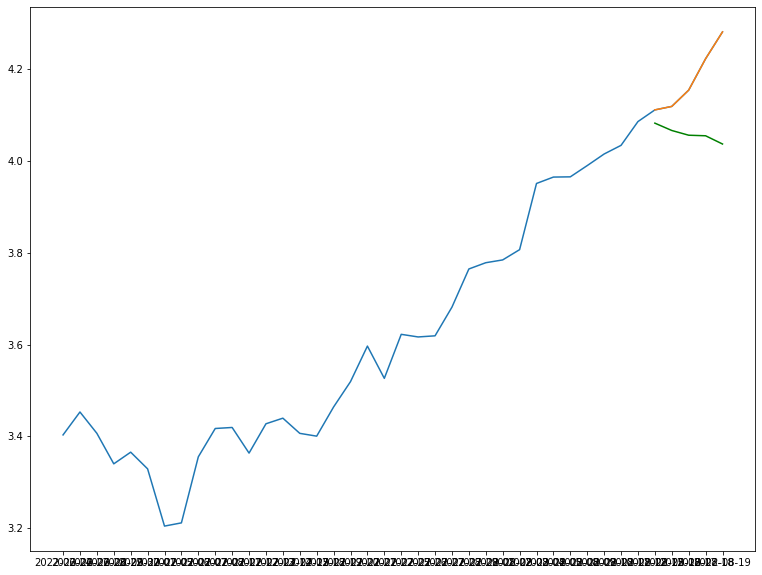

In [508]:
fig, ax = plt.subplots(1,1,figsize = (13,10))
ax.plot(A['Ratio'][-40:])
ax.plot(A.index[-5:],y_test)
ax.plot(A.index[-5:],predictions,c='green')

In [509]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [510]:
mean_absolute_percentage_error(y_test,predictions)

2.8078703873721005